In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn




In [2]:
import pandas as pd
import numpy as np


In [3]:
metadata = pd.read_csv(
    "sample_metadata.tsv",
    sep="\t"
)

metadata.shape


(168464, 11)

In [4]:
metadata.columns


Index(['srs', 'project', 'srr', 'library_strategy', 'library_source',
       'pubdate', 'total_bases', 'instrument', 'geo_loc_name', 'iso',
       'region'],
      dtype='object')

In [5]:
metadata.head()


,srs,project,srr,library_strategy,library_source,pubdate,total_bases,instrument,geo_loc_name,iso,region
0,DRS193785,PRJDB11894,DRR304700,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,24082035.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia
1,DRS193784,PRJDB11894,DRR304699,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,13990122.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia
2,DRS193783,PRJDB11894,DRR304698,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,12318244.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia
3,DRS193782,PRJDB11894,DRR304697,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,10209925.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia
4,DRS193781,PRJDB11894,DRR304696,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,9711564.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia


In [6]:
metadata.columns


Index(['srs', 'project', 'srr', 'library_strategy', 'library_source',
       'pubdate', 'total_bases', 'instrument', 'geo_loc_name', 'iso',
       'region'],
      dtype='object')

In [7]:
metadata.isnull().sum().sort_values(ascending=False).head(15)


geo_loc_name        12887
total_bases          2668
srs                     0
srr                     0
project                 0
library_source          0
library_strategy        0
pubdate                 0
instrument              0
iso                     0
region                  0
dtype: int64

In [8]:
# Drop columns with more than 50% missing data
threshold = len(metadata) * 0.5
metadata_clean = metadata.dropna(axis=1, thresh=threshold)

metadata_clean.shape


(168464, 11)

In [9]:
metadata_clean.head()


,srs,project,srr,library_strategy,library_source,pubdate,total_bases,instrument,geo_loc_name,iso,region
0,DRS193785,PRJDB11894,DRR304700,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,24082035.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia
1,DRS193784,PRJDB11894,DRR304699,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,13990122.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia
2,DRS193783,PRJDB11894,DRR304698,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,12318244.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia
3,DRS193782,PRJDB11894,DRR304697,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,10209925.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia
4,DRS193781,PRJDB11894,DRR304696,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,9711564.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia


In [10]:
# Cell 7: Load microbiome taxonomic table

taxa = pd.read_csv(
    "taxonomic_table.csv.gz",
    compression="gzip"
)

# Check dimensions
taxa.shape


(168464, 4682)

In [11]:
# Check what looks like sample identifiers
metadata_clean[['srs', 'srr']].head()


,srs,srr
0,DRS193785,DRR304700
1,DRS193784,DRR304699
2,DRS193783,DRR304698
3,DRS193782,DRR304697
4,DRS193781,DRR304696


In [14]:
metadata_clean.columns



Index(['project', 'srr', 'library_strategy', 'library_source', 'pubdate',
       'total_bases', 'instrument', 'geo_loc_name', 'iso', 'region'],
      dtype='object')

In [15]:
metadata_clean.index.name


'srs'

In [16]:
# Step 8c: Align samples between metadata and taxa table

# Check how many samples overlap
common_samples = metadata_clean.index.intersection(taxa.index)

print("Matched samples:", len(common_samples))

# Subset both tables
metadata_matched = metadata_clean.loc[common_samples]
taxa_matched = taxa.loc[common_samples]

# Final check
metadata_matched.shape, taxa_matched.shape


Matched samples: 0


((0, 10), (0, 4682))

In [17]:
taxa.head()


,Unnamed: 0,sample,Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Atopobiaceae.Tractidigestivibacter,Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Coriobacteriaceae.Collinsella,Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Adlercreutzia,Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Senegalimassilia,Bacteria.Bacillota.Bacilli.Erysipelotrichales.Erysipelotrichaceae.Holdemanella,Bacteria.Bacillota.Bacilli.Erysipelotrichales.Erysipelotrichaceae.NA,Bacteria.Bacillota.Bacilli.Lactobacillales.Lactobacillaceae.Lactiplantibacillus,Bacteria.Bacillota.Bacilli.Lactobacillales.Lactobacillaceae.Limosilactobacillus,...,Bacteria.Planctomycetota.Phycisphaerae.Phycisphaerales.Phycisphaeraceae.JL-ETNP-F27,Bacteria.Cyanobacteriota.Cyanobacteriia.Cyanobacteriales.Microcystaceae.Crocosphaera,Bacteria.Pseudomonadota.Alphaproteobacteria.Rickettsiales.Rickettsiaceae.Candidatus Gigarickettsia,Bacteria.Bacillota.Bacilli.Bacillales.Bacillaceae.Streptohalobacillus,Bacteria.Cyanobacteriota.Cyanobacteriia.Cyanobacteriales.Cyanobacteriaceae.Cyanobacterium PCC-10605,Bacteria.Bacteroidota.Bacteroidia.Flavobacteriales.Flavobacteriaceae.Flavirhabdus,Bacteria.Pseudomonadota.Alphaproteobacteria.Rhodobacterales.Paracoccaceae.Octadecabacter,Bacteria.Pseudomonadota.Alphaproteobacteria.Acetobacterales.Acetobacteraceae.Swingsia,Bacteria.Bacteroidota.Bacteroidia.Flavobacteriales.Flavobacteriaceae.Aurantiacicella,Archaea.Halobacteriota.Halobacteria.Halobacterales.Halobacteriaceae.Halocalculus
0,1,PRJDB10485_DRR243823,179,435,481,653,471,6,109,495,...,0,0,0,0,0,0,0,0,0,0
1,2,PRJDB10485_DRR243824,0,667,435,140,1798,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,PRJDB10485_DRR243825,0,2025,0,0,3651,0,0,34,...,0,0,0,0,0,0,0,0,0,0
3,4,PRJDB10485_DRR243826,0,1760,0,0,669,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,PRJDB10485_DRR243827,843,6937,366,4222,2166,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
taxa_T = taxa.T
taxa_T.shape


(4682, 168464)

In [19]:
taxa_T = taxa_T.dropna(axis=1, how='all')
taxa_T = taxa_T.fillna(0)

taxa_T.shape


(4682, 168464)

In [20]:
taxa_T = taxa_T.dropna(axis=1, how='all')
taxa_T = taxa_T.fillna(0)

taxa_T.shape


(4682, 168464)

In [21]:
taxa_T.head()


,0,1,2,3,4,5,6,7,8,9,...,168454,168455,168456,168457,168458,168459,168460,168461,168462,168463
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,168455,168456,168457,168458,168459,168460,168461,168462,168463,168464
sample,PRJDB10485_DRR243823,PRJDB10485_DRR243824,PRJDB10485_DRR243825,PRJDB10485_DRR243826,PRJDB10485_DRR243827,PRJDB10485_DRR243828,PRJDB10485_DRR243829,PRJDB10485_DRR243830,PRJDB10485_DRR243831,PRJDB10485_DRR243832,...,PRJNA764337_SRR15959692,PRJNA764337_SRR15959693,PRJNA764337_SRR15959694,PRJNA764337_SRR15959695,PRJNA764337_SRR15959696,PRJNA764337_SRR15959697,PRJNA764337_SRR15959698,PRJNA764337_SRR15959699,PRJNA764337_SRR15959700,PRJNA764337_SRR15959701
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Atopobiaceae.Tractidigestivibacter,179,0,0,0,843,0,2030,29,416,0,...,0,0,0,0,0,0,0,0,0,0
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Coriobacteriaceae.Collinsella,435,667,2025,1760,6937,0,2077,5377,2512,1393,...,0,0,0,0,0,0,0,0,0,0
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Adlercreutzia,481,435,0,0,366,0,445,0,0,430,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Step 10A: Keep only numeric abundance data
taxa_numeric = taxa_T.select_dtypes(include=[np.number])

taxa_numeric.shape


(4682, 0)

In [24]:
# Presence/absence across samples
taxa_presence = (taxa_numeric > 0).sum(axis=1)

taxa_presence.head()


Unnamed: 0                                                                                    0.0
sample                                                                                        0.0
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Atopobiaceae.Tractidigestivibacter    0.0
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Coriobacteriaceae.Collinsella         0.0
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Adlercreutzia         0.0
dtype: float64

In [25]:
# Step 10C: Convert abundance values to numeric
taxa_T_numeric = taxa_T.apply(pd.to_numeric, errors='coerce')

# Fill NaNs created during conversion
taxa_T_numeric = taxa_T_numeric.fillna(0)

taxa_T_numeric.shape


(4682, 168464)

In [26]:
# Count in how many samples each taxon appears
taxa_presence = (taxa_T_numeric > 0).sum(axis=1)

taxa_presence.head()


Unnamed: 0                                                                                    168464
sample                                                                                             0
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Atopobiaceae.Tractidigestivibacter      6439
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Coriobacteriaceae.Collinsella          72609
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Adlercreutzia          17361
dtype: int64

In [27]:
min_samples = int(0.05 * taxa_T_numeric.shape[1])

taxa_filtered = taxa_T_numeric[taxa_presence >= min_samples]

taxa_filtered.shape


(216, 168464)

In [28]:
# Step 11A: Relative abundance normalization

# Divide each value by the total counts per sample
taxa_rel_abundance = taxa_filtered.div(taxa_filtered.sum(axis=0), axis=1)

# Check shape
taxa_rel_abundance.shape


(216, 168464)

In [29]:
# Check column sums (should be ~1.0)
taxa_rel_abundance.sum(axis=0).head()


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [30]:
taxa_rel_abundance.head()


,0,1,2,3,4,5,6,7,8,9,...,168454,168455,168456,168457,168458,168459,168460,168461,168462,168463
Unnamed: 0,0.000011,0.000041,0.000075,0.000120,0.000058,0.000087,0.000085,0.000232,0.000116,0.000230,...,0.848272,0.835948,0.83918,0.836996,0.830498,0.833148,0.830475,0.827591,0.829483,0.851706
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Coriobacteriaceae.Collinsella,0.004589,0.013780,0.050351,0.052753,0.080685,0.000000,0.025082,0.156140,0.032259,0.031981,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Adlercreutzia,0.005074,0.008987,0.000000,0.000000,0.004257,0.000000,0.005374,0.000000,0.000000,0.009872,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Senegalimassilia,0.006888,0.002892,0.000000,0.000000,0.049107,0.000000,0.011955,0.000000,0.000000,0.012375,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bacteria.Bacillota.Bacilli.Erysipelotrichales.Erysipelotrichaceae.Holdemanella,0.004969,0.037146,0.090780,0.020052,0.025193,0.052264,0.009274,0.004065,0.000000,0.057350,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
# Step 12: Log transformation (log1p handles zeros safely)
taxa_log = np.log1p(taxa_rel_abundance)

# Check shape
taxa_log.shape


(216, 168464)

In [32]:
taxa_log.head()


,0,1,2,3,4,5,6,7,8,9,...,168454,168455,168456,168457,168458,168459,168460,168461,168462,168463
Unnamed: 0,0.000011,0.000041,0.000075,0.000120,0.000058,0.000087,0.000085,0.000232,0.000116,0.000230,...,0.614251,0.607561,0.60932,0.608132,0.604588,0.606035,0.604575,0.602999,0.604033,0.616107
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Coriobacteriaceae.Collinsella,0.004578,0.013686,0.049124,0.051409,0.077595,0.000000,0.024772,0.145087,0.031750,0.031480,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Adlercreutzia,0.005061,0.008947,0.000000,0.000000,0.004248,0.000000,0.005359,0.000000,0.000000,0.009824,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Senegalimassilia,0.006865,0.002888,0.000000,0.000000,0.047939,0.000000,0.011884,0.000000,0.000000,0.012299,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bacteria.Bacillota.Bacilli.Erysipelotrichales.Erysipelotrichaceae.Holdemanella,0.004956,0.036473,0.086893,0.019854,0.024881,0.050944,0.009232,0.004057,0.000000,0.055766,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 13a: Transpose so samples are rows (ML requirement)
X = taxa_log.T

# Step 13b: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 13c: PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

# Check shape
X_pca.shape


(168464, 20)

In [34]:
# Step 13A: Transpose so samples are rows
X = taxa_log.T

X.shape


(168464, 216)

In [35]:
from sklearn.decomposition import PCA

# Keep 20 principal components (enough for patterns)
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X)

X_pca.shape


(168464, 20)

In [36]:
import numpy as np

explained_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance[:10]


array([0.47712511, 0.60615251, 0.68750094, 0.73991916, 0.78336055,
       0.80791358, 0.82638287, 0.84117187, 0.85222196, 0.86292906])

In [37]:
from sklearn.cluster import KMeans

# Try 3 clusters (safe starting point)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels
clusters[:10]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [38]:
import pandas as pd

cluster_df = pd.DataFrame({
    "Sample_ID": X.index,
    "Cluster": clusters
})

cluster_df.head()


,Sample_ID,Cluster
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2


In [39]:
cluster_df["Cluster"].value_counts()


Cluster
1    110902
2     41745
0     15817
Name: count, dtype: int64

In [40]:
# Step 15A: Set Sample_ID as index
cluster_df = cluster_df.set_index("Sample_ID")

cluster_df.head()


,Cluster
Sample_ID,
0,2
1,2
2,2
3,2
4,2


In [41]:
# Transpose microbiome table so rows = samples
taxa_samples = taxa_rel_abundance.T

taxa_samples.shape


(168464, 216)

In [42]:
# Merge cluster labels with microbiome data
taxa_with_clusters = taxa_samples.merge(
    cluster_df,
    left_index=True,
    right_index=True,
    how="inner"
)

taxa_with_clusters.head()


,Unnamed: 0,Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Coriobacteriaceae.Collinsella,Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Adlercreutzia,Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Eggerthellaceae.Senegalimassilia,Bacteria.Bacillota.Bacilli.Erysipelotrichales.Erysipelotrichaceae.Holdemanella,Bacteria.Bacillota.Bacilli.Lactobacillales.Lactobacillaceae.Limosilactobacillus,Bacteria.Bacillota.Bacilli.Lactobacillales.Lactobacillaceae.Weissella,Bacteria.Bacillota.Bacilli.Lactobacillales.Streptococcaceae.Streptococcus,Bacteria.Bacillota.Bacilli.RF39.Incertae Sedis.Incertae Sedis,Bacteria.Bacillota.Clostridia.Christensenellales.Christensenellaceae.Christensenellaceae R-7 group,...,Bacteria.Bacillota.Clostridia.Christensenellales.Christensenellaceae.NA,Bacteria.Bacillota.Clostridia.Oscillospirales.Ruminococcaceae.Anaerofilum,Bacteria.Verrucomicrobiota.Lentisphaeria.Victivallales.Victivallaceae.Victivallis,Bacteria.Bacillota.Clostridia.Oscillospirales.Ruminococcaceae.[Clostridium] methylpentosum group,Bacteria.Cyanobacteriota.Cyanobacteriia.Chloroplast.Incertae Sedis.Incertae Sedis,Bacteria.Actinomycetota.Coriobacteriia.Coriobacteriales.Atopobiaceae.Lancefieldella,Bacteria.Bacillota.Bacilli.Erysipelotrichales.Erysipelotrichaceae.Dielma,Bacteria.Bacillota.Clostridia.Peptostreptococcales-Tissierellales.Family XI.Finegoldia,Bacteria.Bacillota.Clostridia.Peptostreptococcales-Tissierellales.Peptostreptococcaceae.Clostridioides,Cluster
0,0.000011,0.004589,0.005074,0.006888,0.004969,0.005222,0.013524,0.003882,0.002025,0.000348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.000041,0.013780,0.008987,0.002892,0.037146,0.000000,0.065843,0.080697,0.008099,0.000041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.000075,0.050351,0.000000,0.000000,0.090780,0.000845,0.000423,0.005470,0.041971,0.004625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.000120,0.052753,0.000000,0.000000,0.020052,0.000000,0.000000,0.112610,0.009022,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.000058,0.080685,0.004257,0.049107,0.025193,0.000000,0.000000,0.000000,0.000000,0.001512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [43]:
# Calculate mean abundance of each taxon per cluster
cluster_profiles = taxa_with_clusters.groupby("Cluster").mean()

cluster_profiles.shape


(3, 216)

In [44]:
# Get top 10 taxa per cluster
top_taxa_per_cluster = {}

for cluster in cluster_profiles.index:
    top_taxa = cluster_profiles.loc[cluster].sort_values(ascending=False).head(10)
    top_taxa_per_cluster[cluster] = top_taxa

# Display
for cluster, taxa in top_taxa_per_cluster.items():
    print(f"\n🔹 Cluster {cluster} – Top taxa:")
    print(taxa)



🔹 Cluster 0 – Top taxa:
Unnamed: 0                                                                                     0.407871
Bacteria.NA.NA.NA.NA.NA                                                                        0.313016
NA.NA.NA.NA.NA.NA                                                                              0.068181
Bacteria.Actinomycetota.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Bifidobacterium    0.043638
Bacteria.Pseudomonadota.NA.NA.NA.NA                                                            0.023355
Bacteria.Bacteroidota.Bacteroidia.Bacteroidales.Prevotellaceae.Segatella                       0.010853
Bacteria.Bacillota.Bacilli.Lactobacillales.Streptococcaceae.Streptococcus                      0.010562
Bacteria.Bacteroidota.Bacteroidia.Bacteroidales.Bacteroidaceae.Bacteroides                     0.010155
Bacteria.Bacillota.Clostridia.Lachnospirales.Lachnospiraceae.Blautia                           0.009274
Bacteria.Bacillota.Clostridia.Oscillosp

In [46]:
# Step 16A: Remove unclassified / NA taxa (FIXED)

clean_cluster_profiles = cluster_profiles.loc[
    :,  # select all rows (clusters)
    ~cluster_profiles.columns.str.contains("NA", case=False)
]

clean_cluster_profiles.shape



(3, 152)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20264\3674752128.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


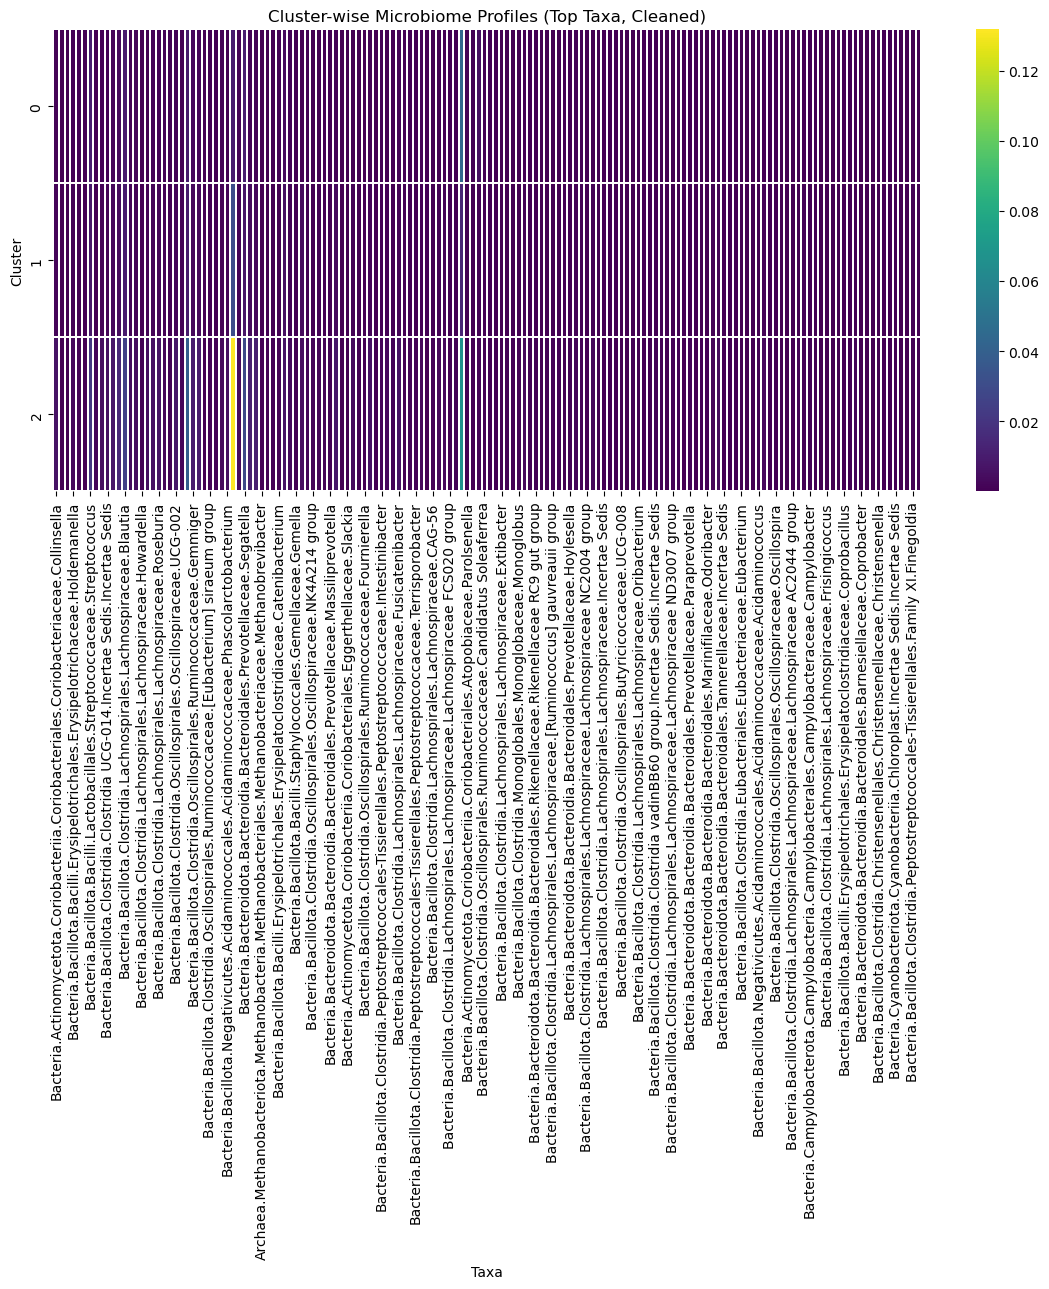

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

sns.heatmap(
    clean_cluster_profiles,
    cmap="viridis",
    linewidths=0.3
)

plt.title("Cluster-wise Microbiome Profiles (Top Taxa, Cleaned)")
plt.xlabel("Taxa")
plt.ylabel("Cluster")

plt.tight_layout()
plt.show()


In [49]:
# Correct cluster dataframe with real sample IDs
cluster_df = pd.DataFrame({
    "Sample_ID": X.index.astype(str),  # real sample IDs
    "Cluster": clusters
})

cluster_df.head()



,Sample_ID,Cluster
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2


In [50]:
metadata_with_clusters = metadata_clean.merge(
    cluster_df,
    left_index=True,
    right_on="Sample_ID",
    how="inner"
)

metadata_with_clusters.head()


,project,srr,library_strategy,library_source,pubdate,total_bases,instrument,geo_loc_name,iso,region,Sample_ID,Cluster


In [51]:
metadata_with_clusters["Cluster"].value_counts()


Series([], Name: count, dtype: int64)

In [52]:
# Step 17A: Correct cluster dataframe using real sample IDs

cluster_df = pd.DataFrame({
    "Sample_ID": taxa_samples.index.astype(str),  # REAL sample IDs
    "Cluster": clusters
})

cluster_df.head()


,Sample_ID,Cluster
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2


In [53]:
metadata_with_clusters = metadata_clean.merge(
    cluster_df,
    left_index=True,     # metadata_clean index = srs
    right_on="Sample_ID",
    how="inner"
)

metadata_with_clusters.head()


,project,srr,library_strategy,library_source,pubdate,total_bases,instrument,geo_loc_name,iso,region,Sample_ID,Cluster


In [54]:
metadata_with_clusters["Cluster"].value_counts()


Series([], Name: count, dtype: int64)

In [55]:
# Step 17 (FINAL): Merge cluster labels with metadata correctly

# Create cluster dataframe using metadata sample IDs
cluster_df = pd.DataFrame({
    "Sample_ID": metadata_clean.index.astype(str),  # REAL sample IDs
    "Cluster": clusters
})

# Merge with metadata
metadata_with_clusters = metadata_clean.merge(
    cluster_df,
    left_index=True,
    right_on="Sample_ID",
    how="inner"
)

# Check result
metadata_with_clusters.head()


,project,srr,library_strategy,library_source,pubdate,total_bases,instrument,geo_loc_name,iso,region,Sample_ID,Cluster
0,PRJDB11894,DRR304700,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,24082035.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia,DRS193785,2
1,PRJDB11894,DRR304699,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,13990122.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia,DRS193784,2
2,PRJDB11894,DRR304698,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,12318244.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia,DRS193783,2
3,PRJDB11894,DRR304697,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,10209925.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia,DRS193782,2
4,PRJDB11894,DRR304696,AMPLICON,METAGENOMIC,2021-07-02 13:48:45,9711564.0,Illumina MiSeq,japan,JP,Eastern and South-Eastern Asia,DRS193781,2


In [56]:
metadata_with_clusters["Cluster"].value_counts()


Cluster
1    110902
2     41745
0     15817
Name: count, dtype: int64

In [57]:
# Step 18A: Cluster-wise summary of sequencing depth

cluster_metadata_summary = (
    metadata_with_clusters
    .groupby("Cluster")
    .agg(
        sample_count=("srr", "count"),
        mean_bases=("total_bases", "mean"),
        median_bases=("total_bases", "median")
    )
)

cluster_metadata_summary


,sample_count,mean_bases,median_bases
Cluster,,,
0,15817,4.508778e+07,21048096.0
1,110902,3.227839e+07,18924128.0
2,41745,3.301227e+07,16942313.0


In [58]:
# Step 18B: Region vs Cluster table

region_cluster_table = pd.crosstab(
    metadata_with_clusters["region"],
    metadata_with_clusters["Cluster"]
)

region_cluster_table


Cluster,0,1,2
region,,,
Australia/New Zealand,121,3046,749
Central and Southern Asia,926,2920,1756
Eastern and South-Eastern Asia,713,10439,7309
Europe and Northern America,8614,75122,19828
Latin America and the Caribbean,140,970,105
Northern Africa and Western Asia,619,693,245
Oceania,0,1,3
Sub-Saharan Africa,956,3168,1829
unknown,3728,14543,9921


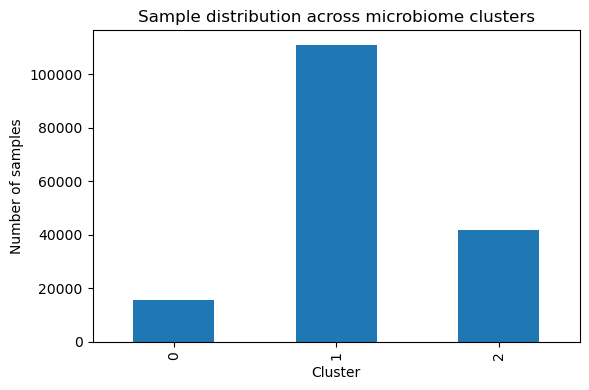

In [59]:
import matplotlib.pyplot as plt

# Plot number of samples per cluster
metadata_with_clusters["Cluster"].value_counts().sort_index().plot(
    kind="bar",
    figsize=(6,4)
)

plt.xlabel("Cluster")
plt.ylabel("Number of samples")
plt.title("Sample distribution across microbiome clusters")
plt.tight_layout()
plt.show()


In [60]:
from scipy.stats import kruskal
import pandas as pd

# Prepare data
taxa_only = taxa_with_clusters.drop(columns=["Cluster"])

results = []

for taxon in taxa_only.columns:
    groups = [
        taxa_with_clusters[taxa_with_clusters["Cluster"] == c][taxon]
        for c in taxa_with_clusters["Cluster"].unique()
    ]
    stat, p = kruskal(*groups)
    results.append((taxon, p))

diff_taxa = pd.DataFrame(results, columns=["Taxon", "p_value"])
diff_taxa = diff_taxa.sort_values("p_value")

diff_taxa.head(10)


,Taxon,p_value
0,Unnamed: 0,0.0
1,Bacteria.Actinomycetota.Coriobacteriia.Corioba...,0.0
2,Bacteria.Actinomycetota.Coriobacteriia.Corioba...,0.0
3,Bacteria.Actinomycetota.Coriobacteriia.Corioba...,0.0
4,Bacteria.Bacillota.Bacilli.Erysipelotrichales....,0.0
6,Bacteria.Bacillota.Bacilli.Lactobacillales.Lac...,0.0
7,Bacteria.Bacillota.Bacilli.Lactobacillales.Str...,0.0
8,Bacteria.Bacillota.Bacilli.RF39.Incertae Sedis...,0.0
12,Bacteria.Bacillota.Clostridia.Lachnospirales.L...,0.0
9,Bacteria.Bacillota.Clostridia.Christensenellal...,0.0


In [61]:
cluster_means = taxa_with_clusters.groupby("Cluster").mean()

top_markers = {}
for c in cluster_means.index:
    top_markers[c] = cluster_means.loc[c].sort_values(ascending=False).head(10)

top_markers


{0: Unnamed: 0                                                                                     0.407871
 Bacteria.NA.NA.NA.NA.NA                                                                        0.313016
 NA.NA.NA.NA.NA.NA                                                                              0.068181
 Bacteria.Actinomycetota.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Bifidobacterium    0.043638
 Bacteria.Pseudomonadota.NA.NA.NA.NA                                                            0.023355
 Bacteria.Bacteroidota.Bacteroidia.Bacteroidales.Prevotellaceae.Segatella                       0.010853
 Bacteria.Bacillota.Bacilli.Lactobacillales.Streptococcaceae.Streptococcus                      0.010562
 Bacteria.Bacteroidota.Bacteroidia.Bacteroidales.Bacteroidaceae.Bacteroides                     0.010155
 Bacteria.Bacillota.Clostridia.Lachnospirales.Lachnospiraceae.Blautia                           0.009274
 Bacteria.Bacillota.Clostridia.Oscillospirales.Rumin

In [3]:
whos

Variable               Type        Data/Info
--------------------------------------------
dataframe_columns      function    <function dataframe_colum<...>ns at 0x0000027F9AD958A0>
dataframe_hash         function    <function dataframe_hash at 0x0000027F9D121940>
dtypes_str             function    <function dtypes_str at 0x0000027F9AD954E0>
get_dataframes         function    <function get_dataframes at 0x0000027F9D2BB1A0>
getpass                module      <module 'getpass' from 'C<...>conda3\\Lib\\getpass.py'>
hashlib                module      <module 'hashlib' from 'C<...>conda3\\Lib\\hashlib.py'>
import_pandas_safely   function    <function import_pandas_s<...>ly at 0x0000027F9AE9C9A0>
is_data_frame          function    <function is_data_frame at 0x0000027F9AD96200>
json                   module      <module 'json' from 'C:\\<...>\Lib\\json\\__init__.py'>


In [4]:
dir()

['In',
 'Out',
 '_',
 '_2',
 '_3',
 '_4',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__pandas',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'dataframe_columns',
 'dataframe_hash',
 'dtypes_str',
 'exit',
 'get_dataframes',
 'get_ipython',
 'getpass',
 'hashlib',
 'import_pandas_safely',
 'is_data_frame',
 'json',
 'open',
 'quit']

In [1]:
[k for k, v in globals().items() if isinstance(v, (list, dict)) or hasattr(v, "shape")]


['_ih', '_oh', '_dh', 'In', 'Out']

In [2]:
import pandas as pd
[name for name, val in globals().items() if isinstance(val, pd.DataFrame)]


[]

In [3]:
cluster_profiles.head()


NameError: name 'cluster_profiles' is not defined

In [4]:
cluster_means.head()

NameError: name 'cluster_means' is not defined

In [5]:
cluster_means = taxa_with_clusters.groupby("Cluster").mean()


NameError: name 'taxa_with_clusters' is not defined